In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
#image = cv2.imread('2.jpg')

In [2]:
def imshow(image):
    b,g,r = cv2.split(image)
    image_rgb = cv2.merge((r,g,b))
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def display(image, name, comment):
    b,g,r = cv2.split(image)
    image_rgb = cv2.merge((r,g,b))
    plt.imshow(image_rgb)
    plt.title(name+comment)
    plt.show()

In [4]:
import cv2

def crop_image(input, output, x, y, width, height):

    # 裁剪图像 x,y center
    output = input[y- height/2:y + height/2, x - width/2: x + width/2]
    return output
   

In [5]:
def detect(path):
    image = cv2.imread(path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义金黄色的 HSV 颜色范围
    lower_golden = np.array([25, 200, 50])
    upper_golden = np.array([34, 255, 255])
    
    # 创建金黄色的掩膜
    mask = cv2.inRange(hsv_image, lower_golden, upper_golden)
    
    # 将掩膜应用于原始图像
    result = cv2.bitwise_and(image, image, mask=mask)
    #plt.imshow(result)
    #plt.show()
    text = pytesseract.image_to_string(result)
    print(text)
    
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    k= 5
    blur = cv2.GaussianBlur(gray, (k, k), 0)
    thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)[1]
    edges = cv2.Canny(thresh, 50, 150)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    alignment_marks = []
    count = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        M = cv2.moments(contour)
    
        #print(area,perimeter)
        #alignment_marks.append(contour)
        #50x if  9000 >area > 7000 and 460 > perimeter > 400:
        
        if 100 > perimeter > 70:
            count += 1
            if area > 20:
                pass
                #print(area,perimeter)
            if 350 >area > 200:
                alignment_marks.append(contour)
                #print(area,perimeter)
                cv2.drawContours(image, alignment_marks, -1, (255, 255, 255), 5)
             # 计算轮廓的中心坐标
                if M["m00"] > 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    cv2.circle(image, (cx, cy), 20, (0, 0, 0), -1)
        
            # 在图像上绘制中心点
    #display(image,path[-6:],str(len(alignment_marks))+'out of'+str(count) + text)
    return len(alignment_marks),count

In [7]:
path = 'C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\16.jpg'
detect(path)

LF
*

a5

LH

ul

MI
-

NI
#

Ol

OJ
?



(21, 34)

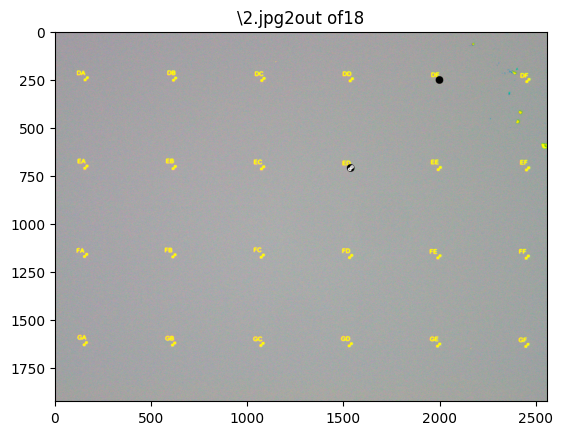

(2, 18)

In [57]:
path = 'C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\' +str(2) + '.jpg'
detect(path)

221.0 78.28427076339722
219.5 76.87005710601807
222.0 79.4558435678482
226.0 79.45584344863892
223.5 76.87005710601807
223.5 80.87005722522736
220.5 76.87005722522736
225.5 78.87005722522736
226.0 76.28427076339722
216.5 76.87005722522736
220.0 80.62741649150848
228.0 79.4558435678482
225.0 79.4558435678482
222.5 78.04163014888763
225.0 77.4558436870575
34.0 75.25483274459839
223.0 77.4558436870575
230.0 79.4558435678482
221.0 80.28427064418793
228.5 78.04163002967834
226.5 80.04163014888763


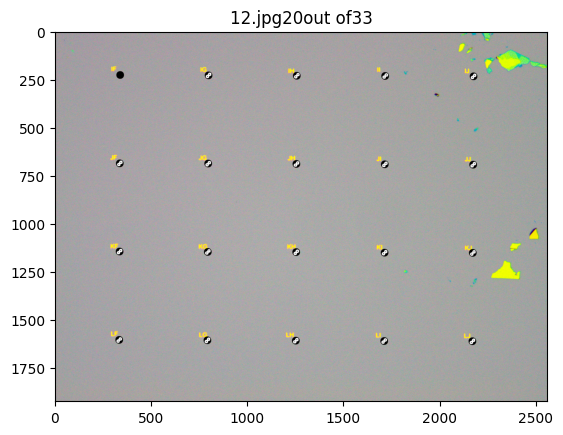

225.0 80.62741649150848
230.0 77.4558435678482
237.0 81.11269783973694
236.0 78.2842708826065
244.0 80.28427076339722
93.0 85.25483310222626
227.0 78.28427076339722
227.5 78.87005710601807
226.5 78.04163014888763
248.5 80.5269113779068
236.0 80.28427064418793
241.0 79.4558435678482
236.5 79.69848418235779
245.0 80.28427064418793
240.5 79.6984840631485
228.0 78.62741661071777
481.5 89.8406194448471
266.5 76.52691113948822
158.5 78.52691149711609
230.5 78.87005722522736
234.0 79.4558435678482
226.0 78.28427064418793
231.0 78.62741649150848


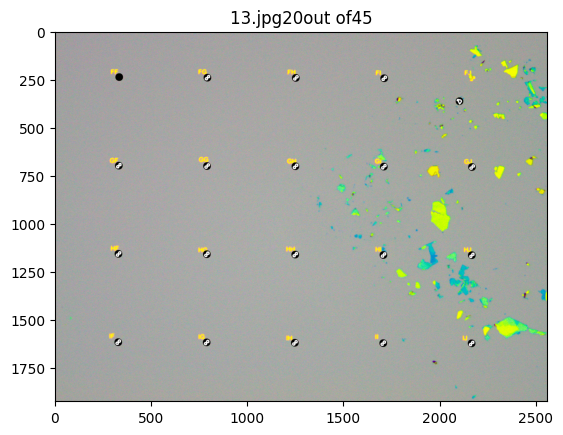

223.0 79.4558436870575
246.5 79.6984840631485
231.5 78.87005722522736
237.5 79.6984840631485
306.0 75.11269772052765
232.0 79.4558435678482
234.5 80.87005710601807
232.0 77.4558435678482
239.0 79.4558435678482
228.5 80.04163014888763
231.0 78.28427076339722
231.0 78.28427076339722
239.0 80.28427076339722
230.5 78.04163002967834
223.5 78.04163002967834
237.5 80.04163002967834
236.5 79.69848430156708
225.0 80.28427052497864
226.0 78.62741661071777


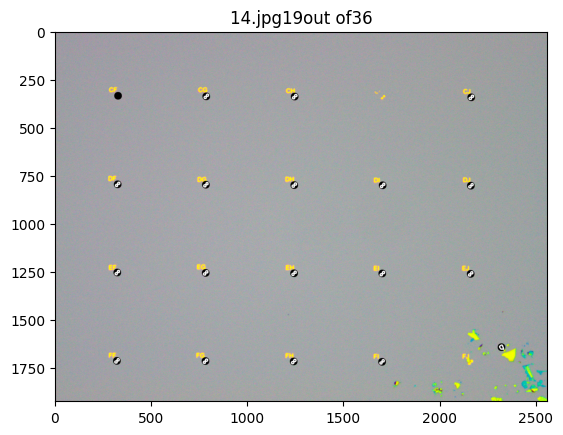

224.5 77.6984840631485
229.5 78.87005710601807
243.0 80.28427064418793
238.0 79.4558435678482
227.5 79.21320307254791
237.5 78.87005722522736
235.0 79.4558435678482
237.0 78.28427076339722
234.5 78.87005710601807
241.0 79.11269772052765
246.0 79.4558435678482
232.5 78.04163002967834
235.5 79.69848430156708
221.0 78.62741661071777
225.5 78.87005722522736
230.5 78.04163002967834
231.5 79.21320295333862
237.0 79.4558436870575


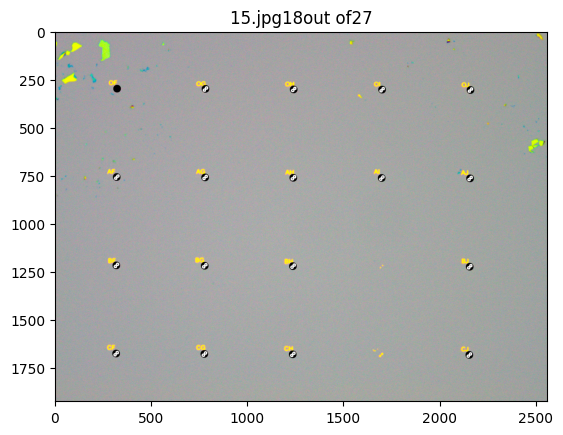

236.0 80.28427064418793
217.0 77.45584380626678
226.5 78.04163014888763
230.0 78.28427076339722
236.0 79.4558436870575
207.5 74.66904652118683
230.5 76.87005722522736
229.0 77.4558435678482
235.5 78.87005698680878
245.0 82.28427064418793
232.5 78.04163014888763
238.5 80.04163014888763
229.0 79.4558435678482
242.0 80.28427076339722
233.5 78.87005698680878
230.0 78.62741661071777
429.5 86.66904628276825
232.5 79.6984840631485
231.5 79.21320295333862
235.5 80.04163014888763
230.5 80.04163014888763
229.5 78.87005722522736


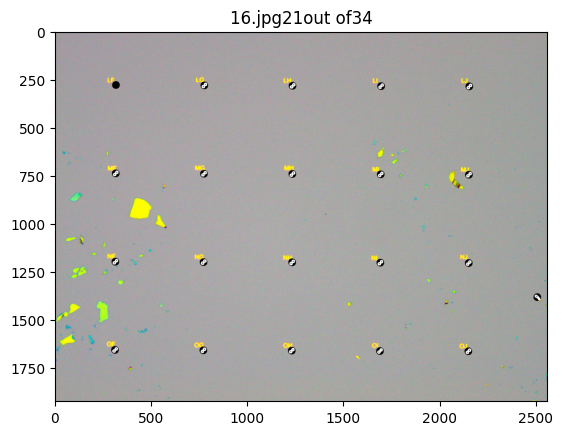

228.5 78.87005710601807
227.5 78.87005710601807
221.5 79.21320307254791
235.5 80.87005710601807
232.0 79.11269760131836
226.5 78.04163014888763
229.0 79.4558435678482
227.0 77.4558436870575
238.0 79.4558436870575
220.5 78.04163002967834
36.5 76.87005698680878
228.0 78.28427076339722
228.5 78.87005710601807
227.0 78.28427064418793
239.5 78.87005722522736
222.0 77.4558435678482
32.0 93.94112479686737
237.5 80.87005710601807
226.5 79.69848418235779
238.5 78.87005722522736
220.0 78.28427064418793
221.5 76.87005710601807


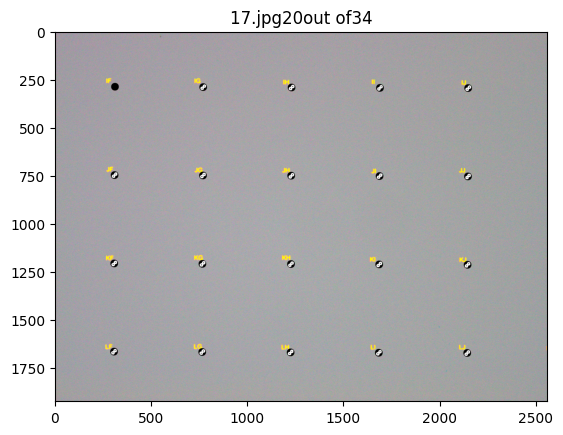

232.5 79.6984840631485
221.0 79.45584344863892
238.0 81.4558435678482
224.0 78.28427064418793
235.0 79.4558435678482
232.0 78.62741649150848
235.0 78.28427064418793
239.0 79.4558436870575
241.0 78.28427064418793
226.5 78.04163002967834
238.5 80.04163002967834
234.5 78.87005698680878
245.0 80.28427076339722
227.5 78.04162991046906
226.0 77.45584380626678
224.5 77.69848430156708
234.0 79.4558436870575
234.5 80.04163002967834
234.0 77.4558435678482
237.5 79.69848430156708


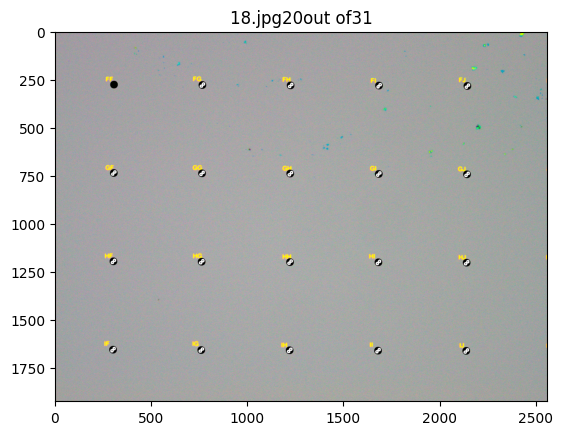

233.0 78.28427076339722
226.5 78.04163002967834
241.5 80.87005722522736
239.5 78.87005722522736
227.0 78.62741649150848
233.5 78.87005710601807
239.5 79.21320307254791
239.0 80.28427064418793
232.0 79.11269783973694
246.0 79.4558435678482
245.0 70.7695517539978
289.5 81.69848430156708
238.0 78.28427064418793
229.0 79.4558435678482
240.0 78.28427052497864
238.5 78.87005710601807
231.0 78.62741661071777
242.5 78.87005722522736
240.0 80.28427064418793
234.0 78.28427064418793
243.0 80.28427064418793


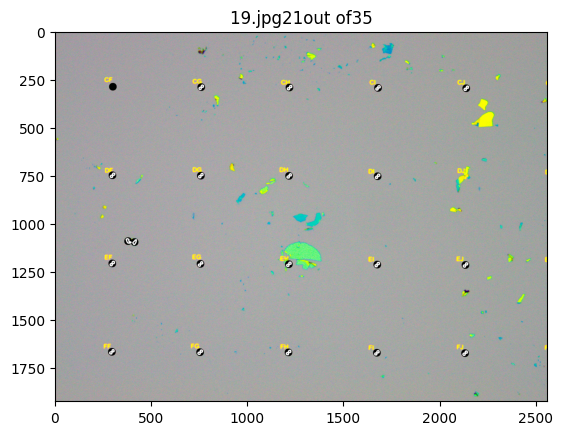

0.5781818181818181


In [73]:
m=0
n=0
for i in range(12,20):
    path = 'C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\' +str(i) + '.jpg'
    p,q = detect(path)
    m+=p
    n+=q
print(m/n)

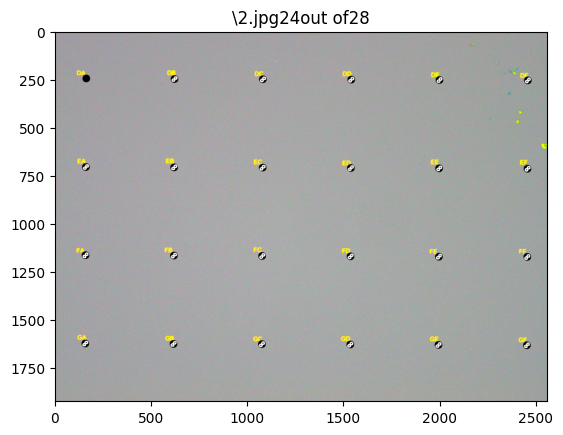

(24, 28)

In [32]:
path = 'C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\2.jpg'
detect(path)

In [ ]:
#display(cv2.imread(path),'','')

images = [cv2.imread(path), gray, blur,]
# 设置子图的行数和列数
rows = 1
cols = len(images)

# 遍历图像并显示
for i in range(len(images)):
    # 获取当前图像
    image = images[i]

    # 创建子图
    ax = plt.subplot(rows, cols, i+1)

    # 显示图像
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')  # 关闭坐标轴

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()



In [ ]:
#display(cv2.imread(path),'','')
#plt.imshow(gray)
k=101
blur = cv2.GaussianBlur(gray, (k,k), 0)
plt.imshow(blur)
plt.show()

In [ ]:
plt.imshow(gray)
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread(path)

# 将图像拆分为 RGB 通道
blue, green, red = cv2.split(image)

# 显示各个通道的图像
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='gray')
plt.axis('off')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='gray')
plt.axis('off')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='gray')
plt.axis('off')
plt.title('Blue Channel')

plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread(path)

# 将图像从 BGR 转换为 RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 将图像转换为一维数组
image_array = image_rgb.reshape((-1, 3))

# 提取每个通道的值
r = image_array[:, 0]
g = image_array[:, 1]
b = image_array[:, 2]

# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(r, g, c=image_array/255, s=1)  # 使用归一化的颜色值和较小的点尺寸
plt.xlabel('Red')
plt.ylabel('Green')
plt.title('RGB Color Space')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 加载图像
image = cv2.imread(path)

# 将图像从 BGR 转换为 HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 将图像转换为一维数组
image_array = image_hsv.reshape((-1, 3))

# 提取每个通道的值
h = image_array[:, 0]
s = image_array[:, 1]
v = image_array[:, 2]

# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(h, s, c=v, cmap='hsv', s=1)  # 使用颜色值作为散点图的颜色，颜色映射使用 'hsv'
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('HSV Color Space')
plt.show()

In [ ]:
imshow(image)

In [ ]:
import cv2
import numpy as np

# 加载图像
image = cv2.imread(path)

# 将图像从 BGR 转换为 HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义金黄色的 HSV 颜色范围
lower_golden = np.array([20, 50, 50])
upper_golden = np.array([40, 255, 255])

# 创建金黄色的掩膜
mask = cv2.inRange(hsv_image, lower_golden, upper_golden)

# 将掩膜应用于原始图像
result = cv2.bitwise_and(image, image, mask=mask)

# 显示原始图像和筛选结果
plt.imshow(image)
plt.show()
plt.imshow(result)
plt.show()

display(image,'','')
display(result,'','')

In [52]:
'''
def detect(path):
    image = cv2.imread(path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义金黄色的 HSV 颜色范围
    lower_golden = np.array([20, 50, 50])
    upper_golden = np.array([40, 255, 255])
    
    # 创建金黄色的掩膜
    mask = cv2.inRange(hsv_image, lower_golden, upper_golden)
    
    # 将掩膜应用于原始图像
    result = cv2.bitwise_and(image, image, mask=mask)

    plt.imshow(result)
    plt.show()
    
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    k= 5
    blur = cv2.GaussianBlur(gray, (k, k), 0)
    thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)[1]
    edges = cv2.Canny(thresh, 50, 150)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    alignment_marks = []
    count = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        M = cv2.moments(contour)
    
        #print(area,perimeter)
        #alignment_marks.append(contour)
        #50x if  9000 >area > 7000 and 460 > perimeter > 400:
        
        if 90 > perimeter > 80:
            count += 1
            if 300 >area > 250:
                alignment_marks.append(contour)
                #print(area,perimeter)
                cv2.drawContours(image, alignment_marks, -1, (255, 255, 255), 5)
             # 计算轮廓的中心坐标
                if M["m00"] > 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    cv2.circle(image, (cx, cy), 20, (0, 0, 0), -1)
        
            # 在图像上绘制中心点
    display(image,path[-6:],str(len(alignment_marks))+'out of'+str(count))
    return len(alignment_marks),count
    '''

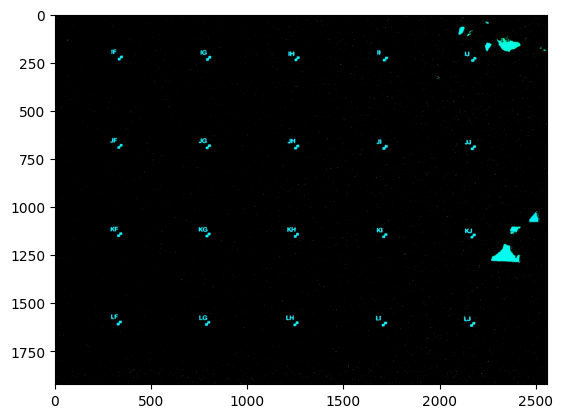

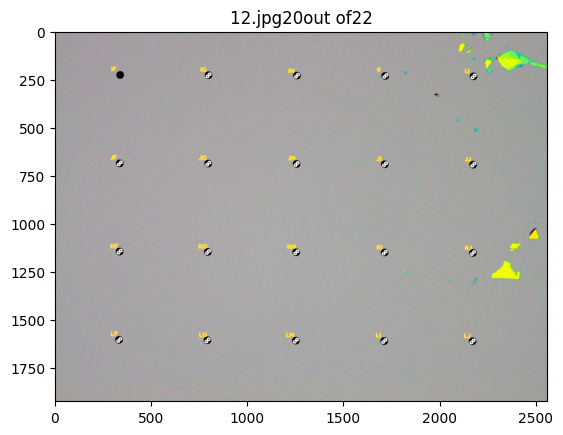

(20, 22)

In [53]:
path = 'C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\12.jpg'
detect(path)

In [12]:
path='color.png'
color_deter=cv2.imread(path)



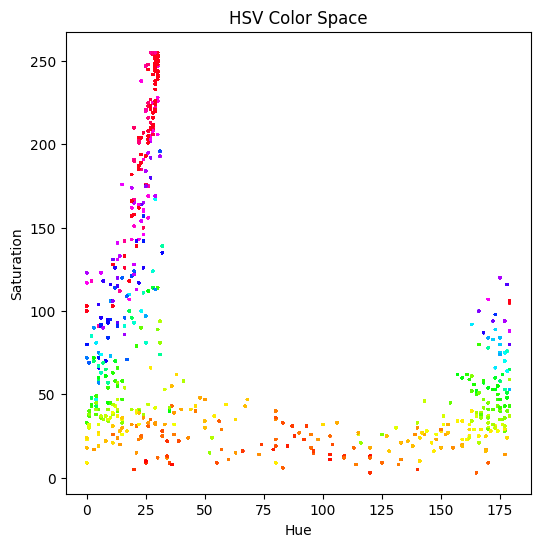

In [35]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 加载图像
path = 'yellow2.png'
image = cv2.imread(path)

# 将图像从 BGR 转换为 HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 将图像转换为一维数组
image_array = image_hsv.reshape((-1, 3))

# 提取每个通道的值
h = image_array[:, 0]
s = image_array[:, 1]
v = image_array[:, 2]

# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(h, s, c=v, cmap='hsv', s=1)  # 使用颜色值作为散点图的颜色，颜色映射使用 'hsv'
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('HSV Color Space')
plt.show()

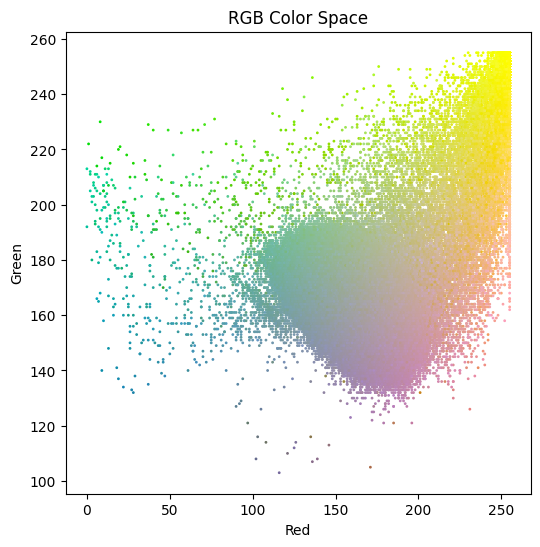

In [14]:
import cv2
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread(path)

# 将图像从 BGR 转换为 RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 将图像转换为一维数组
image_array = image_rgb.reshape((-1, 3))

# 提取每个通道的值
r = image_array[:, 0]
g = image_array[:, 1]
b = image_array[:, 2]

# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(r, g, c=image_array/255, s=1)  # 使用归一化的颜色值和较小的点尺寸
plt.xlabel('Red')
plt.ylabel('Green')
plt.title('RGB Color Space')
plt.show()

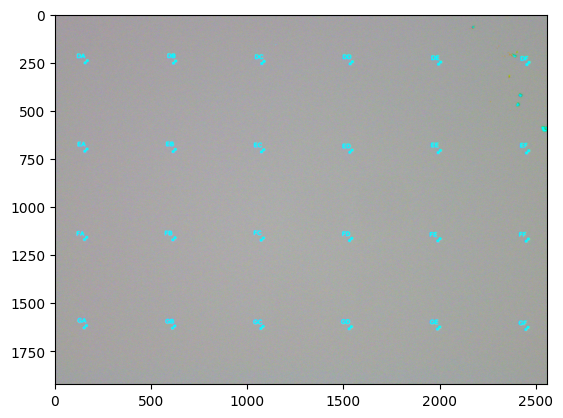

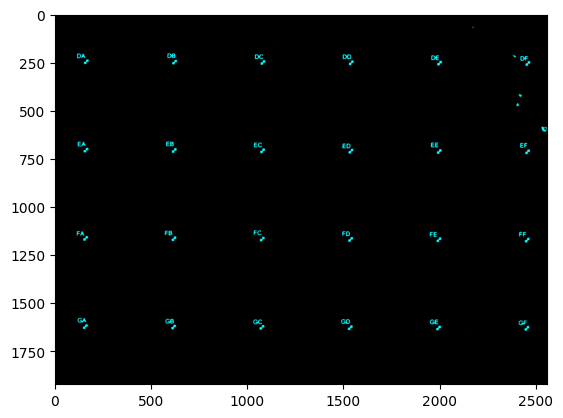

FA

aS

8

FB

FE
#

FF



In [90]:
import cv2
import pytesseract
import os

image = cv2.imread('C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\2.jpg')
plt.imshow(image)
plt.show()
# 将图像转换为灰度图
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义金黄色的 HSV 颜色范围
lower_golden = np.array([25, 200, 50])
upper_golden = np.array([34, 255, 255])

# 创建金黄色的掩膜
mask = cv2.inRange(hsv_image, lower_golden, upper_golden)

# 将掩膜应用于原始图像
result = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(result)
plt.show()
# 使用Tesseract进行识别
text = pytesseract.image_to_string(result, lang='eng')

# 打印识别结果
print(text)

In [117]:
image = cv2.imread('txt.png')

text = pytesseract.image_to_string(image, lang='eng',config = "--psm 6 --oem 1")
print(text)

ee



In [70]:
text

''

In [89]:
path

'C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\15.jpg'

ee

-------------
— oe
i

FC
“esa



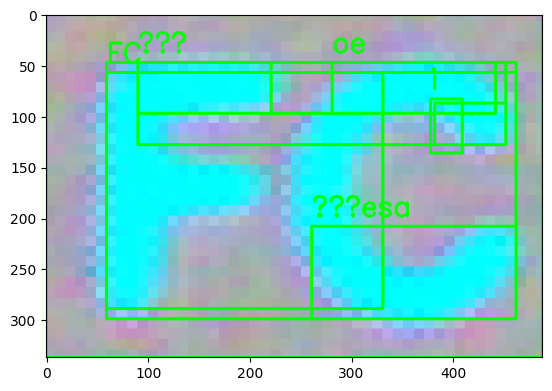

In [157]:
#path='C:\\Users\\wuyx0\\Desktop\\coda\\autoalign\\pics\\2.jpg'
path= 'txt.png'
image = cv2.imread(path)
text = pytesseract.image_to_string(image, lang='eng',config = "--psm 6 --oem 1")
print(text)
print('-------------')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义金黄色的 HSV 颜色范围
lower_golden = np.array([25, 200, 50])
upper_golden = np.array([34, 255, 255])


# 创建金黄色的掩膜
mask = cv2.inRange(hsv_image, lower_golden, upper_golden)

# 将掩膜应用于原始图像
result = cv2.bitwise_and(image, image, mask=mask)
#plt.imshow(result)
#plt.show()
# 使用Tesseract进行识别
text = pytesseract.image_to_string(result, lang='eng',config = "--psm 6 --oem 1")

# 打印识别结果
print(text)
print('===========================')

data = pytesseract.image_to_data(result,lang='eng', config = "--psm 6 --oem 1",output_type=pytesseract.Output.DICT)

# 遍历每个字符的信息
for i in range(len(data['text'])):
    # 获取字符文本和位置信息
    tx = data['text'][i]
    x = data['left'][i]
    y = data['top'][i]
    w = data['width'][i]
    h = data['height'][i]
    
    # 绘制边界框
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # 在图像上显示字符文本
    cv2.putText(image, tx, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


plt.imshow(image)
plt.show()




In [127]:
boxes

''

In [148]:
print(data)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 

In [139]:
str='ABCDEFGHIJKLMNO'
if 'D' in str:
    print("T")
else:
    print('F')

T


In [142]:
detect(path)

FA

aS

8

FB

FE
#

FF



(25, 52)

In [156]:
data['text']

['',
 '',
 '',
 '',
 'DA',
 'De',
 'Dc',
 'DD',
 'DE',
 '»',
 'oF',
 '',
 '-',
 '&',
 '-',
 'Ps',
 '?',
 '',
 'La',
 '',
 'é',
 '',
 'v',
 '',
 'EA',
 '—B',
 'EC',
 'ED',
 'EE',
 'EF',
 '',
 'od',
 'FA',
 '-',
 '-',
 '?',
 '?',
 '',
 'FA',
 'FB',
 'FC',
 'FD',
 'FE',
 'FF',
 '',
 '?',
 'F',
 'Fa',
 '-',
 'é',
 'é',
 '',
 'GA',
 'GB',
 'Gc',
 'GD',
 'GE',
 'GF',
 '',
 'F',
 '?',
 '-',
 '-',
 'F',
 '?']

In [150]:
print(text)

DA De Dc DD DE » oF
- & - Ps ?
La
é
v
EA —B EC ED EE EF
od FA - - ? ?
FA FB FC FD FE FF
? F Fa - é é
GA GB Gc GD GE GF
F ? - - F ?



In [151]:
print(text)

DA De Dc DD DE » oF
- & - Ps ?
La
é
v
EA —B EC ED EE EF
od FA - - ? ?
FA FB FC FD FE FF
? F Fa - é é
GA GB Gc GD GE GF
F ? - - F ?

